# Pincipal Component Analysis in scikit-learn - Lab

## Introduction

Now that you've seen a brief introduction to PCA, it's time to try implementing the algorithm on your own.

## Objectives

You will be able to:

- Perform PCA in Python and scikit-learn using Iris dataset
- Measure the impact of PCA on the accuracy of classification algorithms
- Plot the decision boundary of different classification experiments to visually inspect their performance. 

## Iris Dataset

To practice PCA, you'll take a look at the iris dataset. Run the cell below to load it.

In [13]:
# Load necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# loading dataset into Pandas DataFrame
iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
                 , names=['sepal length','sepal width','petal length','petal width','target'])
iris.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In a minute, you'll perform PCA and visualize the datasets principle components. Before, its helpful to get a little more context regarding the data that you'll be working with. Run the cell below in order to visualize the pairwise feature plots. With this, notice how the target labels are easily separable by any one of the given features.

In [7]:
df.Target.value_counts()

2    50
1    50
0    50
Name: Target, dtype: int64

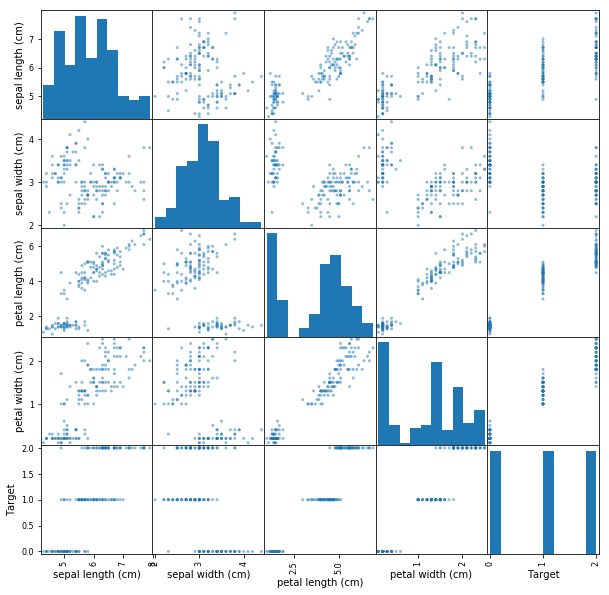

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
Target               150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 5.9 KB


In [20]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [14]:
# Create features and Target dataset
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
X = iris.loc[:, features].values
y = iris.loc[:,['target']].values

In [15]:
# Standardize the features
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
pd.DataFrame(data = X, columns = features).head()

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


## PCA Projection to 2D Space

Now its time to perform PCA! Project the original data which is 4 dimensional into 2 dimensions. The new components are just the two main dimensions of variance present in the data.

- Initialize an instance of PCA from scikit-learn with 2 components
- Fit the data to the model
- Extract the first 2 principal components from the trained model

In [16]:
# Run the PCA algorithm
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

To visualize the components, it will be useful to also look at the target associated with the particular observation. 
As such, append the target (flower name) to the principal components in a pandas dataframe.

In [17]:
# Create a new dataset fro principal components 
df = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])
result_df = pd.concat([df, iris[['target']]], axis = 1)
result_df.head(5)

,PC1,PC2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


Great, you now have a set of two dimensions, reduced from four against our target variable, the flower name.

## Visualize Principal Components 

Using the target data, we can visualize the principal components according to the class distribution. 
- Create a scatter plot from principal components while color coding the examples

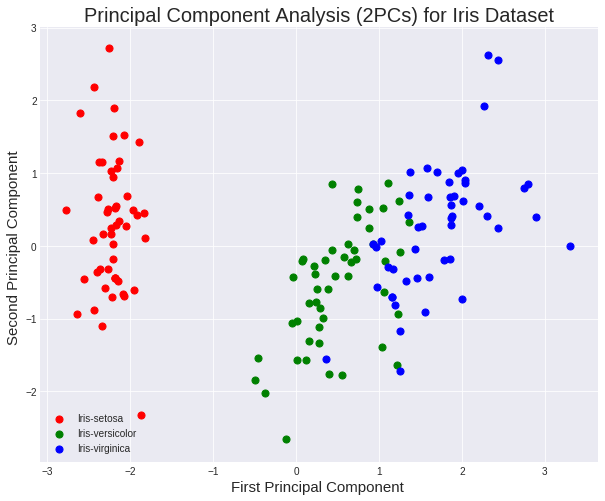

In [18]:
# Principal Componets scatter plot
plt.style.use('seaborn-dark')
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('First Principal Component ', fontsize = 15)
ax.set_ylabel('Second Principal Component ', fontsize = 15)
ax.set_title('Principal Component Analysis (2PCs) for Iris Dataset', fontsize = 20)


targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = iris['target'] == target
    ax.scatter(result_df.loc[indicesToKeep, 'PC1']
               , result_df.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## Explained Variance


You can see above that the three classes in the dataset are fairly well separable. As such, this compressed representation of the data is probably sufficient for the classification task at hand. Compare the variance in the overall dataset to that captured from your two primary components.

In [19]:
# Calculate the variance explained by pricipal components
print('Variance of each component:', pca.explained_variance_ratio_)
print('\n Total Variance Explained:', round(sum(list(pca.explained_variance_ratio_))*100, 2))


Variance of each component: [0.72770452 0.23030523]

 Total Variance Explained: 95.8


As you should see, these first two principal components account for the vast majority of the overall variance in the dataset. This is indicative of the total information encapsulated in the compressed representation compared to the original encoding.

## Compare Performance of an Classifier with PCA

Since the principal components explain 95% of the variance in the data, it is interesting to consider how a classifier trained on the compressed version would compare to one trained on the original dataset.

- Run a `KNeighborsClassifier` to classify the Iris dataset 
- Use a trai/test split of 80/20
- For reproducability of results, set random state =9 for the split
- Time the process for splitting, training and making prediction

In [20]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import timeit


X = iris[['sepal length','sepal width','petal length','petal width']]
y = iris.target
y = preprocessing.LabelEncoder().fit_transform(y)
start = timeit.timeit()
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=9)
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
Yhat = model.predict(X_test)
acc = metrics.accuracy_score(Yhat, Y_test)
end = timeit.timeit()
print("Accuracy:",acc)
print ("Time Taken:", end - start)

Accuracy: 1.0
Time Taken: -0.05013841949403286


Great , so you can see that we are able to classify the data with 100% accuracy in the given time. Remember the time taken may different randomly based on the load on your cpu and number of processes running on your PC. 

Now repeat the above process for dataset made from principal components 
- Run a `KNeighborsClassifier` to classify the Iris dataset with principal components
- Use a trai/test split of 80/20
- For reproducability of results, set random state =9 for the split
- Time the process for splitting, training and making prediction

In [21]:
# Run the classifer on PCA'd data
X = result_df[['PC1', 'PC2']]
y = iris.target
y = preprocessing.LabelEncoder().fit_transform(y)

start = timeit.timeit()
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=9)
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
Yhat = model.predict(X_test)
acc = metrics.accuracy_score(Yhat, Y_test)
end = timeit.timeit()
print("Accuracy:",acc)
print ("Time Taken:", end - start)

Accuracy: 0.9666666666666667
Time Taken: 1.3826414942741394e-05


While some accuracy is loss in this representation, the training time has vastly improved. In more complex cases, PCA can even improve the accuracy of some machine learning tasks. In particular, PCA can be useful to reduce overfitting.

## Summary 

In this lab you applied PCA to the popular Iris dataset. You looked at performance of a simple classifier and impact of PCA on it. From here, you'll continue to explore PCA at more fundamental levels.